In [17]:
import numpy as np
import pandas as pd
import io
from google.colab import files

In [18]:
# File must be using 
# uploaded=files.upload() 
# To upload files
# filename='filename.csv'
def csv_to_list_xyz(filename):
  str1=uploaded[filename]
  s=str1.decode('utf-8')
  t=s.split()
  ord_x=np.array([float(i) for i in t[7::7]])
  ord_y=np.array([float(i) for i in t[8::7]])
  ord_z=np.array([float(i) for i in t[9::7]])
  X=[[x,y,z] for x,y,z in zip(ord_x,ord_y,ord_z)]
  return ord_x,ord_y,ord_z,X

In [19]:
# infuence_radius= Euclidian Distance to choose influencer points
# Inverse Distance weights are used 
def Norm_point_cloud(X_offground,X_ground, influence_radius):
  X_norm=[]
  for i in X_offground:
    influ=[[x,y,z] for x,y,z in X_ground if (abs(x-i[0])<=influence_radius and abs(y-i[1])<=influence_radius)]
    if len(influ)>1:
      dist=[((((x-i[0])**2)+((y-i[1])**2))**.5) for x,y,z in influ]
      inv_dist=[1/x for x in dist]
      total=sum(inv_dist)
      wts=[x/total for x in inv_dist]
      interpol=sum([w*x[2] for w,x in zip(wts,influ)])
      X_norm.append([i[0],i[1],(i[2]-interpol)])
    else:
      X_norm.append(i)
  return(X_norm)

In [20]:
uploaded=files.upload()

Saving ground points3.csv to ground points3 (2).csv


In [21]:
X_ground_x,X_ground_y,X_ground_z,X_ground=csv_to_list_xyz(filename='ground points3.csv')

In [22]:
uploaded=files.upload()

Saving off-ground points3.csv to off-ground points3 (2).csv


In [23]:
X_offground_x,X_offground_y,X_offground_z,X_offground=csv_to_list_xyz(filename='off-ground points3.csv')

In [24]:
Norm_X=Norm_point_cloud(X_offground,X_ground,20)

In [25]:
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt

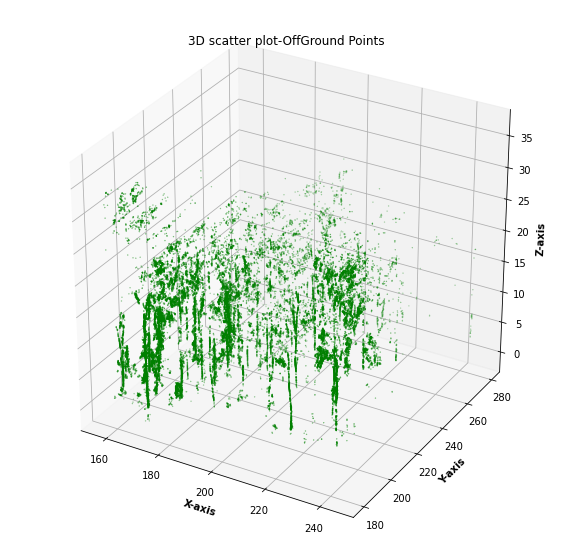

In [29]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.scatter3D(X_offground_x, X_offground_y, X_offground_z, color = "green",s=.1)
plt.title("3D scatter plot-OffGround Points")
ax.set_xlabel('X-axis', fontweight ='bold') 
ax.set_ylabel('Y-axis', fontweight ='bold') 
ax.set_zlabel('Z-axis', fontweight ='bold')

 
# show plot
plt.show()

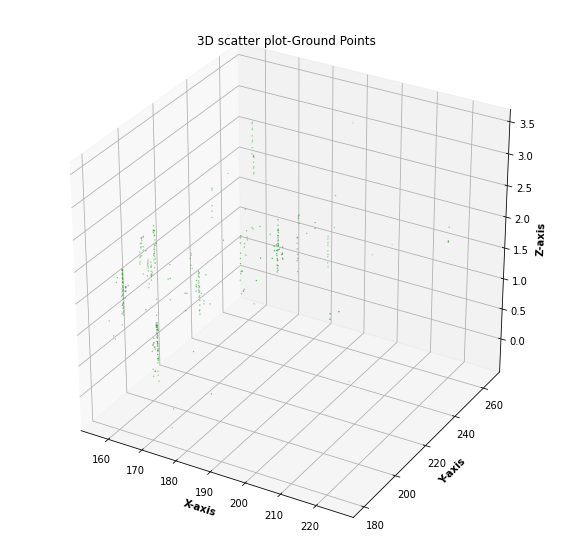

In [30]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.scatter3D(X_ground_x, X_ground_y, X_ground_z, color = "green",s=.1)
plt.title("3D scatter plot-Ground Points")
ax.set_xlabel('X-axis', fontweight ='bold') 
ax.set_ylabel('Y-axis', fontweight ='bold') 
ax.set_zlabel('Z-axis', fontweight ='bold')

 
# show plot
plt.show()

In [31]:
X_Norm_x=[a for a,b,c in Norm_X]
X_Norm_y=[b for a,b,c in Norm_X]
X_Norm_z=[c for a,b,c in Norm_X]

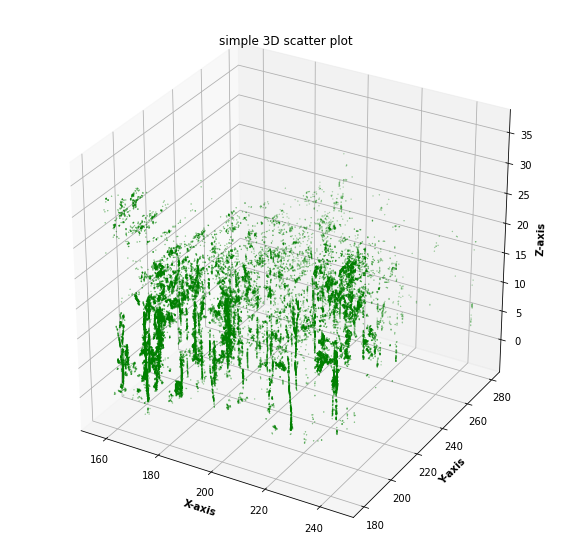

In [32]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.scatter3D(X_Norm_x, X_Norm_y, X_Norm_z, color = "green",s=.1)
plt.title("simple 3D scatter plot")
ax.set_xlabel('X-axis', fontweight ='bold') 
ax.set_ylabel('Y-axis', fontweight ='bold') 
ax.set_zlabel('Z-axis', fontweight ='bold')

 
# show plot
plt.show()

In [33]:
len(X_ground)

364

In [34]:
len(X_offground)

41915

In [35]:
max(X_offground_z)

36.32699966

In [36]:
max(X_Norm_z)

35.91249847

In [37]:
from sklearn.cluster import DBSCAN


In [68]:
eps,min_samples=.5,10
dbscan=DBSCAN(eps=eps,min_samples=min_samples)
model=dbscan.fit(Norm_X)
labels=model.labels_

Text(0.5, 0.92, 'DBSCAN: eps=0.5 min_samples=10')

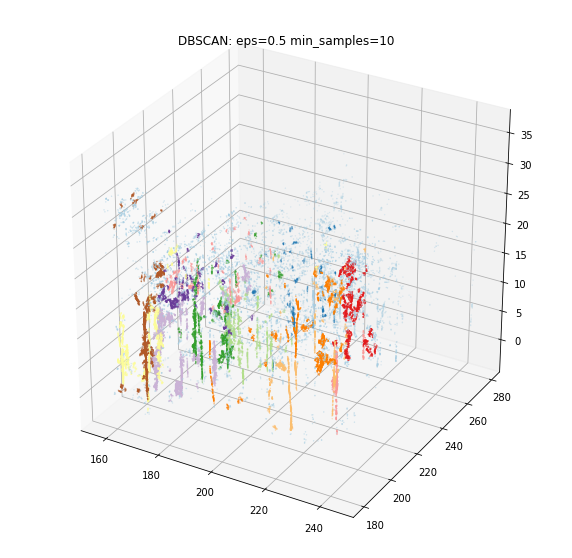

In [69]:
y_pred = dbscan.fit_predict(Norm_X)
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.scatter3D(X_Norm_x,X_Norm_y,X_Norm_z,c=y_pred, cmap='Paired',s=.1)
plt.title("DBSCAN: eps="+str(eps)+" min_samples="+str(min_samples))

In [70]:
max(y_pred)

486